# Comparison of Classification Algorithms

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("social.csv")

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

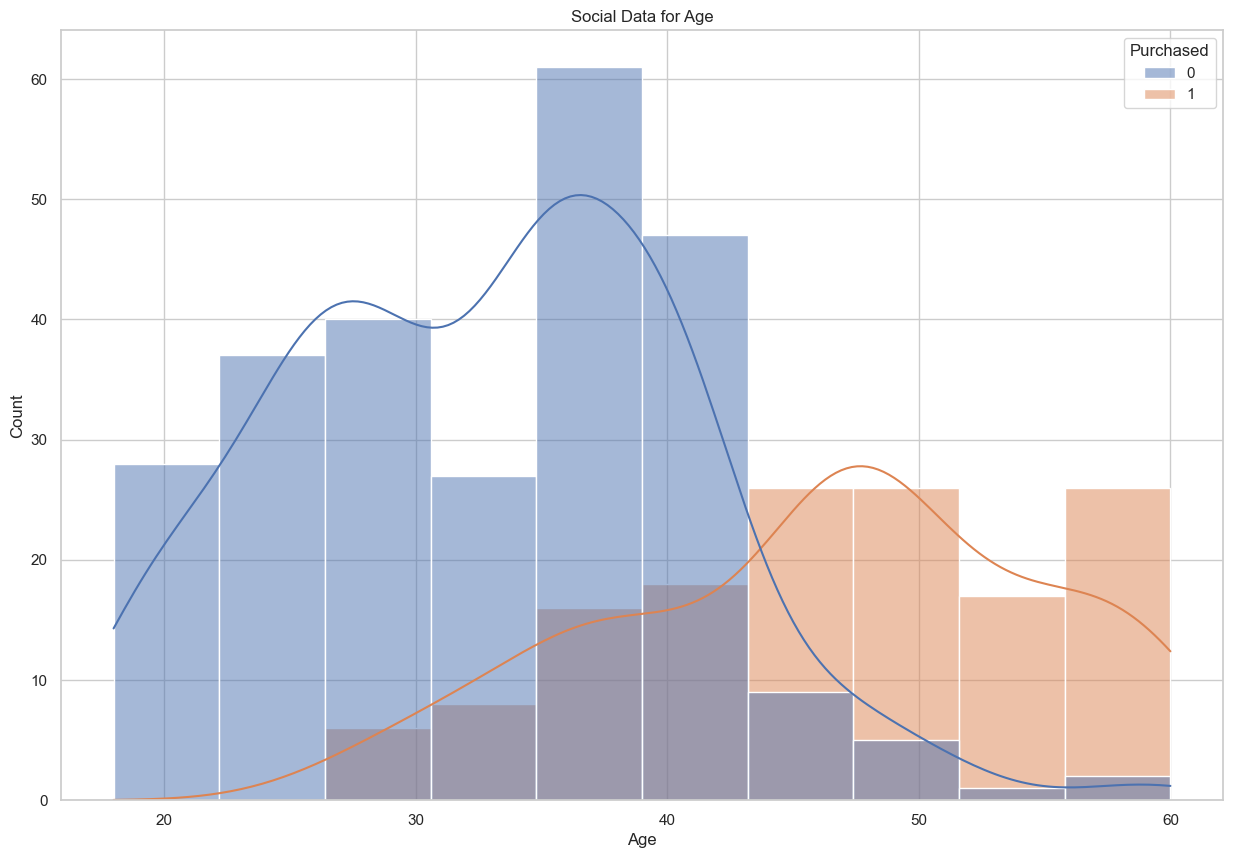

In [6]:
#Müşterilerin Ne Age Dağılımına göre sipariş graiği
plt.figure(figsize=(15, 10))
plt.title("Social Data for Age")
sns.histplot(x="Age", hue="Purchased", data=df,kde=True )
plt.show()

# Modeling

In [12]:
from sklearn.model_selection import train_test_split
x = np.array(df[["Age", "EstimatedSalary"]])
y = np.array(df[["Purchased"]])

In [13]:
def fnc_classification_all_model(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    from sklearn.ensemble import GradientBoostingClassifier
    
    import imblearn
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
              
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    G=GradientBoostingClassifier()
      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13)
    
    
    algos=[g,b,KN,SVC,D,R,Log,XGB,G]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier','GradientBoostingClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    RUS=RandomUnderSampler(random_state=42)
    x_RUS,y_RUS=RUS.fit_resample(x_train,y_train)
    
    for item in algos:

        #item.fit(x_RUS,y_RUS)
        predict=item.fit(x_RUS,y_RUS).predict(x_test)
        
        
        accuracy_scored.append(accuracy_score(y_test,predict))
        precision_scored.append(precision_score(y_test,predict))
        recall_scored.append(recall_score(y_test,predict))
        f1_scored.append(f1_score(y_test,predict))

    result=pd.DataFrame(columns=['accuracy_score','f1_score','recall_score','precision_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    
    return result.sort_values('accuracy_score',ascending=False)

In [14]:
fnc_classification_all_model(x,y)

,accuracy_score,f1_score,recall_score,precision_score
RandomForestClassifier,0.90,0.848485,1.000000,0.736842
GradientBoostingClassifier,0.90,0.843750,0.964286,0.750000
GaussianNB,0.89,0.825397,0.928571,0.742857
XGBClassifier,0.89,0.830769,0.964286,0.729730
DecisionTreeClassifier,0.88,0.812500,0.928571,0.722222
KNeighborsClassifier,0.83,0.746269,0.892857,0.641026
SVC,0.74,0.593750,0.678571,0.527778
BernoulliNB,0.72,0.000000,0.000000,0.000000
LogisticRegression,0.28,0.437500,1.000000,0.280000


# PyCaret Classification Tahminleme Yapalım

In [15]:
from pycaret.classification import*

In [16]:
##Modelimizi Compile Ediyoruz
exp_name=setup(df,target='Purchased')

,Description,Value
0,Session id,4221
1,Target,Purchased
2,Target type,Binary
3,Original data shape,"(400, 3)"
4,Transformed data shape,"(400, 3)"
5,Transformed train set shape,"(280, 3)"
6,Transformed test set shape,"(120, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [17]:
##Eniyi Model Karşılaştırması
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9036,0.9664,0.8600,0.8766,0.8641,0.7896,0.7939,0.5540
rf,Random Forest Classifier,0.9036,0.9444,0.8700,0.8653,0.8643,0.7897,0.7934,0.6830
ada,Ada Boost Classifier,0.9036,0.9664,0.8600,0.8742,0.8598,0.7870,0.7946,0.6390
qda,Quadratic Discriminant Analysis,0.9000,0.9736,0.8700,0.8601,0.8620,0.7838,0.7871,0.5740
gbc,Gradient Boosting Classifier,0.8964,0.9658,0.8200,0.8807,0.8458,0.7685,0.7729,0.6450
lightgbm,Light Gradient Boosting Machine,0.8964,0.9536,0.8600,0.8530,0.8544,0.7742,0.7764,0.8520
xgboost,Extreme Gradient Boosting,0.8929,0.9525,0.8600,0.8462,0.8518,0.7680,0.7694,0.6800
et,Extra Trees Classifier,0.8857,0.9286,0.8300,0.8514,0.8368,0.7492,0.7533,0.7530
dt,Decision Tree Classifier,0.8786,0.8656,0.8200,0.8359,0.8220,0.7306,0.7366,0.5510
lda,Linear Discriminant Analysis,0.8607,0.9386,0.7500,0.8520,0.7883,0.6863,0.6980,0.5800


Processing:   0%|          | 0/65 [00:00<?, ?it/s]